In [2]:
import matplotlib.pyplot as plt
from loader import load_image
import torch
import torch.nn.functional as F

**Ejercicio 4**. Aplicar el filtro de Sobel en la imagen ad-benneton.jpg. Obtener
las máscaras de contornos a partir de:

In [13]:
# Definir filtros de Sobel
sobel_x = torch.tensor([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]],
                        dtype=torch.float32).unsqueeze(0).unsqueeze(0)

sobel_y = torch.tensor([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]],
                        dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Aplicar el filtro de convolución
def apply_sobel_filter(image, kernel):
    return F.conv2d(image, kernel, padding=1)

image = load_image("ad-benneton.jpg")

torch.Size([1, 995, 1100])


• Binarizar el módulo del gradiente obtenido conservando los valores del gradiente superiores al 90% del máximo gradiente.

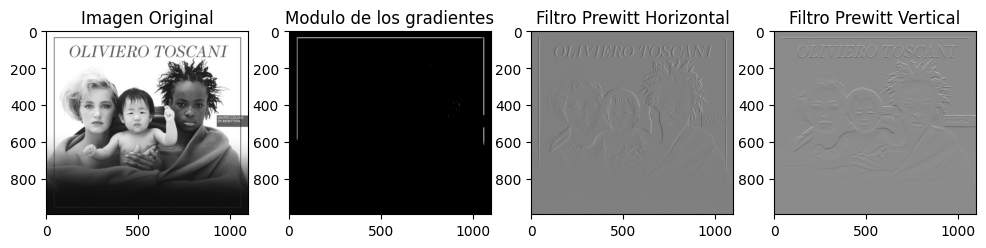

In [15]:
edges_x = apply_sobel_filter(image, sobel_x)
edges_y = apply_sobel_filter(image, sobel_y)

edges = torch.sqrt(edges_x ** 2 + edges_y ** 2)
binary_edges = (edges > 0.75 * edges.max()).float()

# Visualizar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.title('Imagen Original')
plt.imshow(image.squeeze(), cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Filtro Prewitt Horizontal')
plt.imshow(edges_x.squeeze().detach().numpy(), cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Filtro Prewitt Vertical')
plt.imshow(edges_y.squeeze().detach().numpy(), cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Modulo de los gradientes')
plt.imshow(binary_edges.squeeze().detach().numpy(), cmap='gray')

plt.show()

['_Image__transformer',
 '__annotations__',
 '__array_interface__',
 '__arrow_c_array__',
 '__arrow_c_schema__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attach_default_encoderinfo',
 '_close_exclusive_fp_after_loading',
 '_close_fp',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_exif_offset',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_huffman_ac',
 '_huffman_dc',
 '_im',
 '_min_frame',
 '_mode',
 '_new',
 '_open',
 '_read_dpi_from_exif',
 '_readonly',
 '_reload_exif',
 '_repr_i